Columns in the dataset: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                 

C:\Users\dell\AppData\Local\Temp\ipykernel_9596\317007942.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Study Preparation', y='Math Score', data=df, jitter=True, palette='coolwarm')


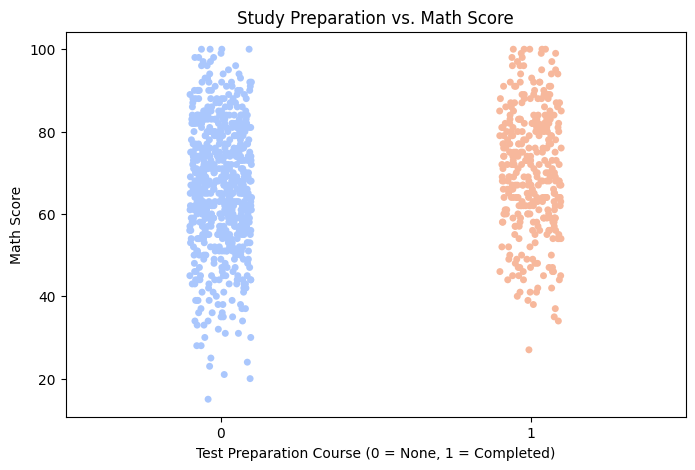

Mean Squared Error: 85.65731678524732
R² Score: 0.6119958164117987


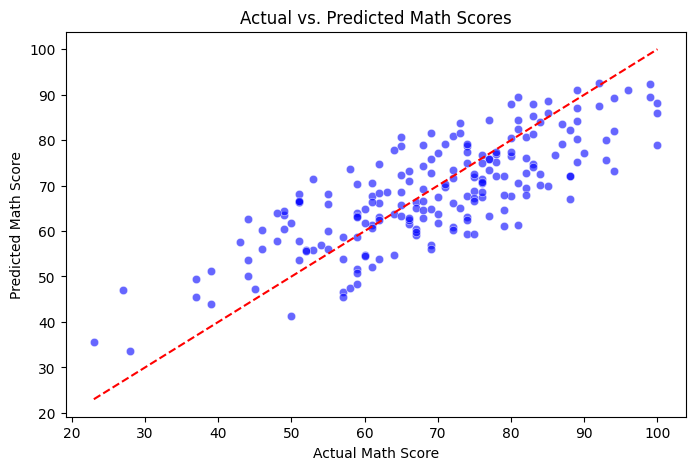

Model saved successfully at: ../model\student_performance_model.pkl
Training log saved at: ../model\training_log.txt


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Load the dataset using a relative path
dataset_path = '../data/exams.csv'
df = pd.read_csv(dataset_path)

# Print column names to check dataset structure
print("Columns in the dataset:", df.columns)
print(df.head())

# Selecting relevant features (including reading & writing scores for better predictions)
df = df[['test preparation course', 'reading score', 'writing score', 'math score']]
df.columns = ['Study Preparation', 'Reading Score', 'Writing Score', 'Math Score']

# Convert categorical data to numerical values
df['Study Preparation'] = df['Study Preparation'].map({'none': 0, 'completed': 1})

# Data visualization
plt.figure(figsize=(8,5))
sns.stripplot(x='Study Preparation', y='Math Score', data=df, jitter=True, palette='coolwarm')
plt.title("Study Preparation vs. Math Score")
plt.xlabel("Test Preparation Course (0 = None, 1 = Completed)")
plt.ylabel("Math Score")
plt.show()

# Prepare data for training
X = df[['Study Preparation', 'Reading Score', 'Writing Score']]
y = df['Math Score']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualizing Regression Predictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs. Predicted Math Scores")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.show()

# Save the trained model
model_folder = '../model'
os.makedirs(model_folder, exist_ok=True)
model_path = os.path.join(model_folder, 'student_performance_model.pkl')
joblib.dump(model, model_path)
print("Model saved successfully at:", model_path)

# Save training performance log
log_path = os.path.join(model_folder, 'training_log.txt')
with open(log_path, "w") as log_file:
    log_file.write(f"Mean Squared Error: {mse}\nR² Score: {r2}\n")
print("Training log saved at:", log_path)
